In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [3]:
df=wholesale_customers.variables.copy()
wholesale_customers.variables.head()

,name,role,type,demographic,description,units,missing_values
0,Channel,Feature,Categorical,None,None,None,no
1,Region,Target,Categorical,None,None,None,no
2,Fresh,Feature,Integer,None,None,None,no
3,Milk,Feature,Integer,None,None,None,no
4,Grocery,Feature,Integer,None,None,None,no


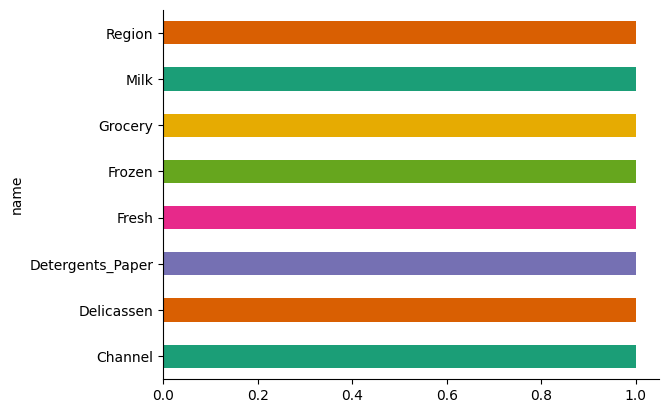

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

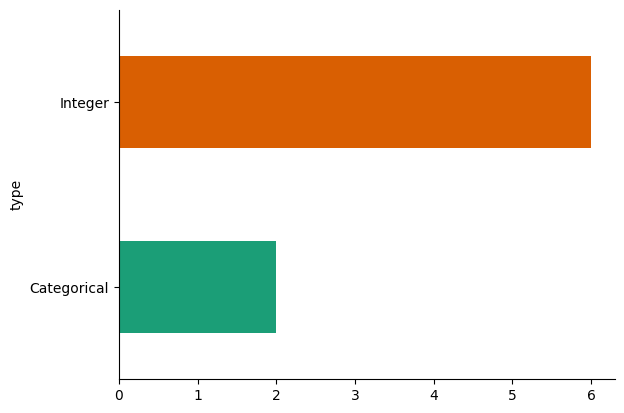

In [5]:
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

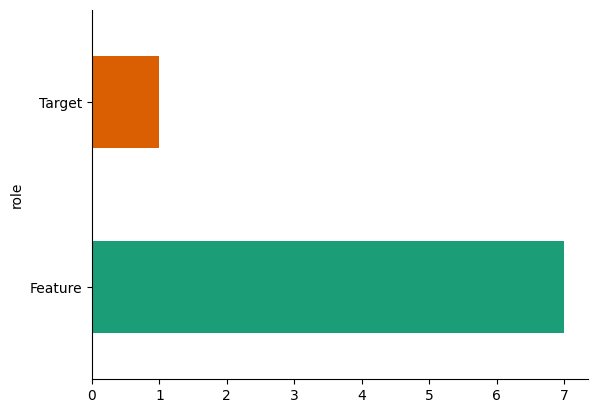

In [6]:
df.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


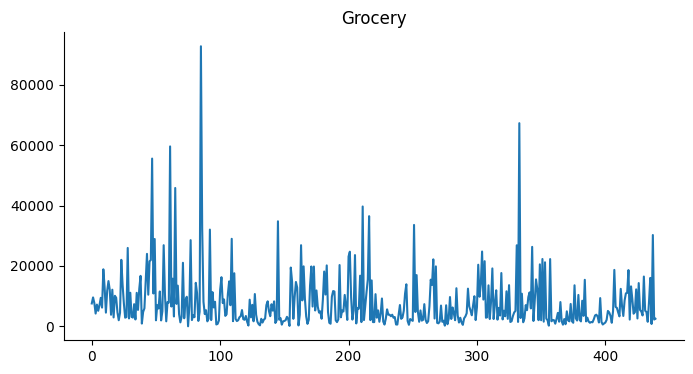

In [8]:
X['Grocery'].plot(kind='line', figsize=(8, 4), title='Grocery')
plt.gca().spines[['top', 'right']].set_visible(False)

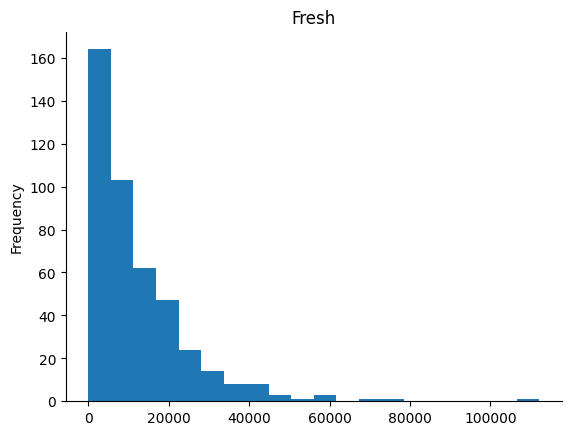

In [9]:
X['Fresh'].plot(kind='hist', bins=20, title='Fresh')
plt.gca().spines[['top', 'right',]].set_visible(False)

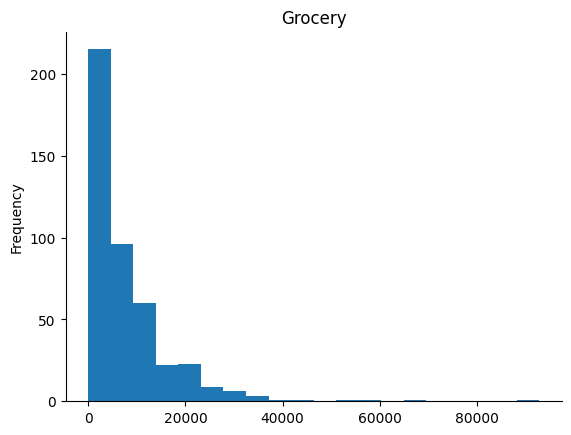

In [10]:
X['Grocery'].plot(kind='hist', bins=20, title='Grocery')
plt.gca().spines[['top', 'right',]].set_visible(False)

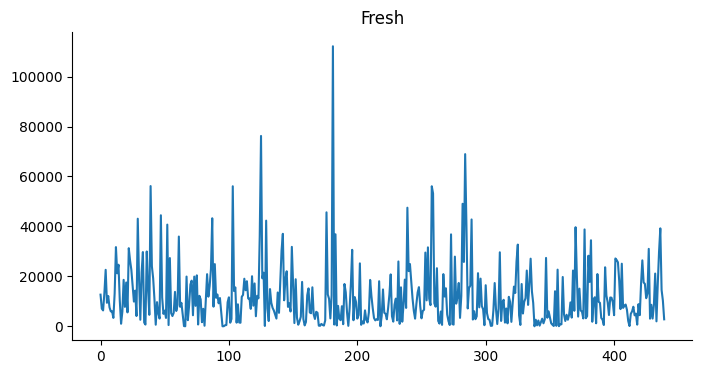

In [11]:
X['Fresh'].plot(kind='line', figsize=(8, 4), title='Fresh')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
y.head()

,Region
0,3
1,3
2,3
3,3
4,3


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = lr.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R^2: -0.2070267534099861
Linear Regression MSE: 0.4799115926845748


In [15]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_dt = dt.predict(X_test)
print("Decision Tree R^2:", r2_score(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree R^2: -1.515102305943488
Decision Tree MSE: 1.0


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R^2: -0.34304176680740484
Random Forest MSE: 0.5339909090909091


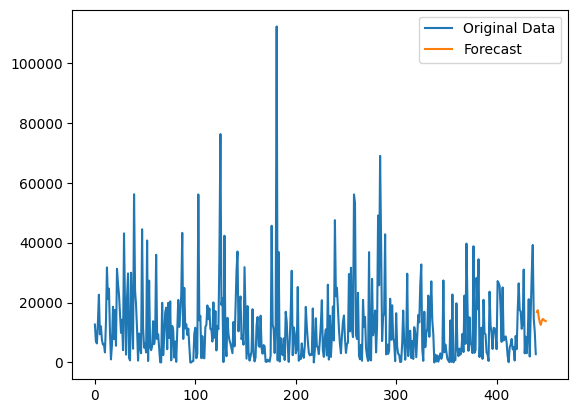

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Let's assume 'Fresh' is our time series data
time_series_data = X['Fresh']

# Fit ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(time_series_data, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Make a prediction
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.plot(time_series_data, label='Original Data')
plt.plot(range(len(time_series_data), len(time_series_data) + 10), forecast, label='Forecast')
plt.legend()
plt.show()


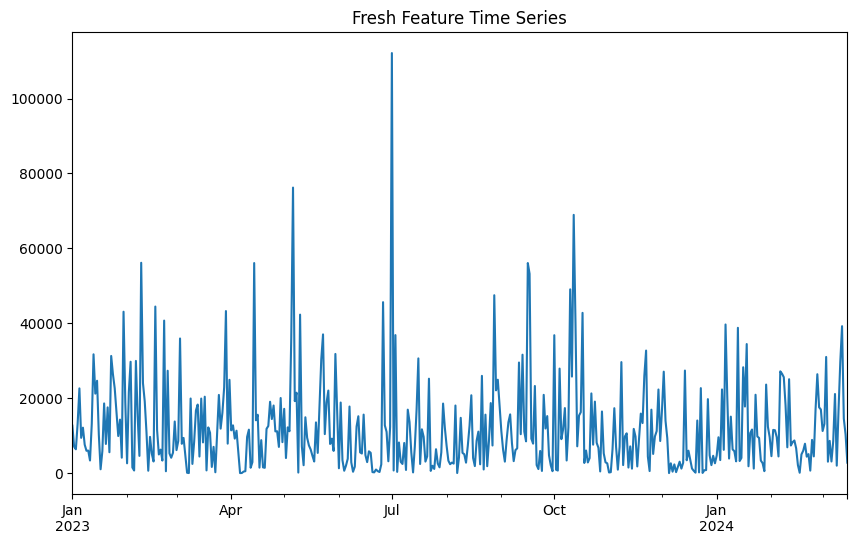

In [18]:
# Assume 'Fresh' is our time series data
time_series_data = X['Fresh']

# Create a time index if needed (let's assume daily data for simplicity)
time_series_data.index = pd.date_range(start='2023-01-01', periods=len(time_series_data), freq='D')

# Plot the time series data
time_series_data.plot(title="Fresh Feature Time Series", figsize=(10, 6))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


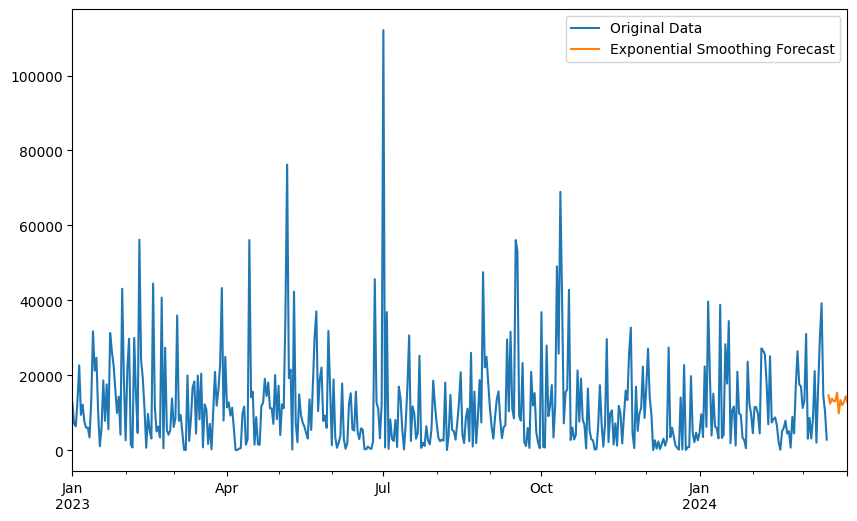

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing
model_es = ExponentialSmoothing(time_series_data, trend="add", seasonal="add", seasonal_periods=12)
model_es_fit = model_es.fit()

# Forecasting
forecast_es = model_es_fit.forecast(steps=12)

# Plot the forecast
time_series_data.plot(label="Original Data", figsize=(10, 6))
forecast_es.plot(label="Exponential Smoothing Forecast")
plt.legend()
plt.show()


In [20]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9zkl_s4/58tvcz5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw9zkl_s4/qim8btqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64580', 'data', 'file=/tmp/tmpw9zkl_s4/58tvcz5_.json', 'init=/tmp/tmpw9zkl_s4/qim8btqp.json', 'output', 'file=/tmp/tmpw9zkl_s4/prophet_modelz0j24p9b/prophet_model-20240905053304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

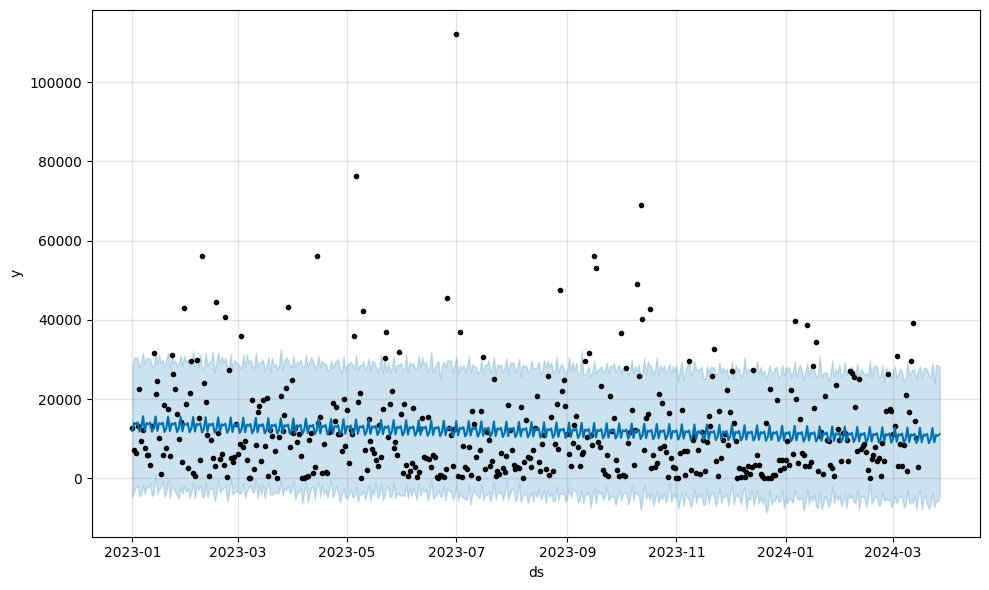

In [21]:
from prophet import Prophet

# Prepare the data for Prophet (requires a specific format)
df_prophet = time_series_data.reset_index().rename(columns={'index': 'ds', 'Fresh': 'y'})

# Initialize and fit the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Forecast for the next 12 days
future = model_prophet.make_future_dataframe(periods=12)
forecast_prophet = model_prophet.predict(future)

# Plot the forecast
model_prophet.plot(forecast_prophet)
plt.show()

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluation
print("SVM R^2:", r2_score(y_test, y_pred_svr))
print("SVM MSE:", mean_squared_error(y_test, y_pred_svr))


SVM R^2: -1.261463545424422
SVM MSE: 0.8991537004599427


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluation
print("GBM R^2:", r2_score(y_test, y_pred_gbr))
print("GBM MSE:", mean_squared_error(y_test, y_pred_gbr))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM R^2: -0.40135010879916644
GBM MSE: 0.5571741974422306


In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN R^2:", r2_score(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))


KNN R^2: -0.4919129587528417
KNN MSE: 0.5931818181818183


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the DNN model
model_dnn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model_dnn.compile(optimizer='adam', loss='mse')

# Train the model
history = model_dnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_dnn = model_dnn.predict(X_test)

# Evaluation
print("DNN R^2:", r2_score(y_test, y_pred_dnn))
print("DNN MSE:", mean_squared_error(y_test, y_pred_dnn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
DNN R^2: -0.4317560232183193
DNN MSE: 0.5692635324753623


In [26]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape input for 1D CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the 1D CNN model
model_cnn = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='mse')

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_cnn = model_cnn.predict(X_test_cnn)

# Evaluation
print("CNN R^2:", r2_score(y_test, y_pred_cnn))
print("CNN MSE:", mean_squared_error(y_test, y_pred_cnn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
CNN R^2: -0.6537605323826989
CNN MSE: 0.6575321125008174


In [27]:
from tensorflow.keras.layers import LSTM

# Reshape input for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Evaluation
print("LSTM R^2:", r2_score(y_test, y_pred_lstm))
print("LSTM MSE:", mean_squared_error(y_test, y_pred_lstm))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
LSTM R^2: -0.23990365144914194
LSTM MSE: 0.4929833862102155
